In [7]:
import numpy as np

x = np.array([0, 1/4, 1/2, 3/4, 1])
y = np.sin(np.pi * x)

x_interp = np.array([0, 1/6, 1/3, 1/2, 2/3, 5/6, 1])
y_interp = np.interp(x_interp, x, y)

for i in range(len(x_interp)):
    print(f"Приближенное значение синуса в точке {x_interp[i]}: {y_interp[i]}")


#Когда мы используем числа с плавающей запятой для представления действительных чисел, 
#иногда возникают маленькие ошибки округления. В данном случае, значение 1.0 должно быть точно равно нулю, так как sin(π) = 0. 
#Однако, из-за ограничений представления чисел с плавающей запятой, возникают маленькие погрешности, 
#и значение приближается к нулю, но не достигает его точно.

Приближенное значение синуса в точке 0.0: 0.0
Приближенное значение синуса в точке 0.16666666666666666: 0.4714045207910317
Приближенное значение синуса в точке 0.3333333333333333: 0.804737854124365
Приближенное значение синуса в точке 0.5: 1.0
Приближенное значение синуса в точке 0.6666666666666666: 0.804737854124365
Приближенное значение синуса в точке 0.8333333333333334: 0.4714045207910317
Приближенное значение синуса в точке 1.0: 1.2246467991473532e-16


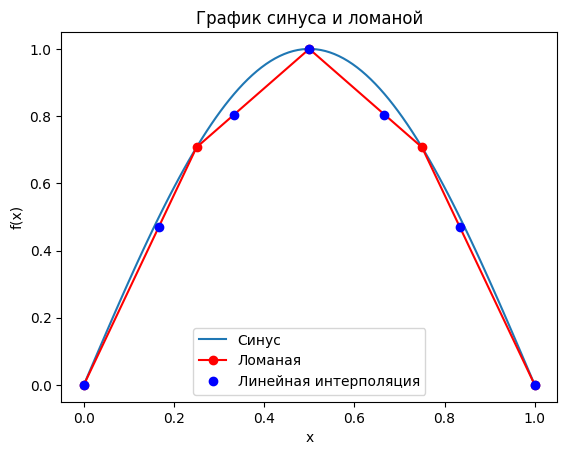

In [9]:
import matplotlib.pyplot as plt

# График синуса
x_sin = np.linspace(0, 1, 100)
y_sin = np.sin(np.pi * x_sin)

# График ломаной
x_line = np.linspace(0, 1, 5)
y_line = np.sin(np.pi * x_line)

# График линейной интерполяции
x_interp = np.array([0, 1/6, 1/3, 1/2, 2/3, 5/6, 1])
y_interp = np.interp(x_interp, x, y)

# Построение графиков
plt.plot(x_sin, y_sin, label='Синус')
plt.plot(x_line, y_line, 'ro-', label='Ломаная')
plt.plot(x_interp, y_interp, 'bo', label='Линейная интерполяция')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График синуса и ломаной')
plt.legend()
plt.show()


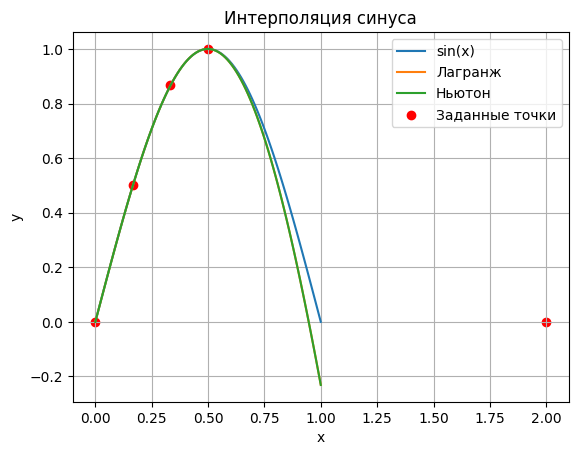

Максимальная ошибка Лагранж: 0.2311707506646813
Максимальная ошибка Ньютон: 0.2311707506647677


In [29]:
#2 задание
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.optimize import newton

# Заданные точки
x = np.array([0, 1/6, 1/3, 1/2, 2]) # <--------------- 3 задание (можно добавлять любое количество точек)
y = np.sin(np.pi * x)

# Интерполяционный многочлен Лагранжа
poly_lagrange = lagrange(x, y)

# Интерполяционный многочлен Ньютона
coefficients = np.polyfit(x, y, len(x)-1)
poly_newton = np.poly1d(coefficients)

# Значения функции в заданных точках
x_vals = np.linspace(0, 1, 100)
y_vals_lagrange = poly_lagrange(x_vals)
y_vals_newton = poly_newton(x_vals)

# Значения синуса в заданных точках
y_vals_sin = np.sin(np.pi * x_vals)

# Графики синуса и интерполяционных многочленов
plt.plot(x_vals, y_vals_sin, label='sin(x)')
plt.plot(x_vals, y_vals_lagrange, label='Лагранж')
plt.plot(x_vals, y_vals_newton, label='Ньютон')
plt.scatter(x, y, color='red', label='Заданные точки')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Интерполяция синуса')
plt.grid(True)
plt.show()

# Максимальная ошибка аппроксимации полиномом
max_error_lagrange = np.max(np.abs(y_vals_lagrange - y_vals_sin))
max_error_newton = np.max(np.abs(y_vals_newton - y_vals_sin))

print(f'Максимальная ошибка Лагранж: {max_error_lagrange}')
print(f'Максимальная ошибка Ньютон: {max_error_newton}')


#5 задание
#Когда мы вычисляем значение интерполяционного полинома в точке t = 2, мы фактически вычисляем значение полинома вне интервала,
#на котором были заданы точки. Это приводит к большому отклонению от значения синуса в этой точке.

#Интерполяционный полином Лагранжа строится на основе полиномиальной аппроксимации, которая может быть точной только на интервале,
#где точки были заданы. Вне этого интервала, полином может сильно отклоняться от истинного значения функции.

#Чтобы получить более точное значение синуса в точке t = 2, требуется использовать более точную аппроксимацию или увеличить количество точек,
#на которых строится интерполяционный полином.

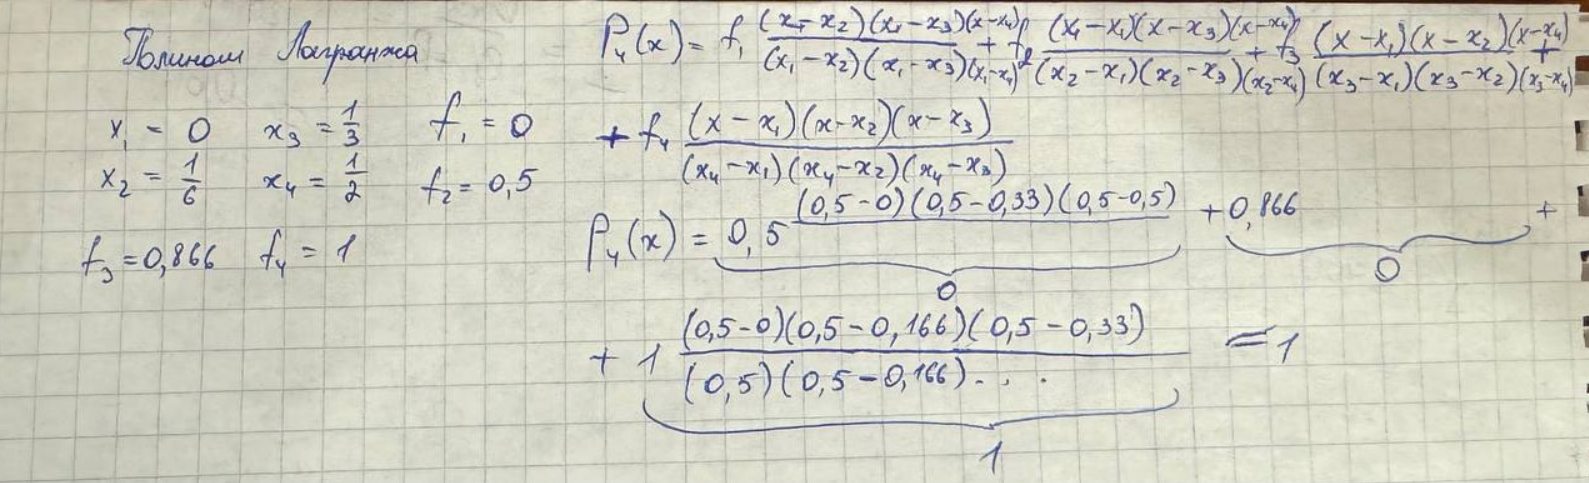и

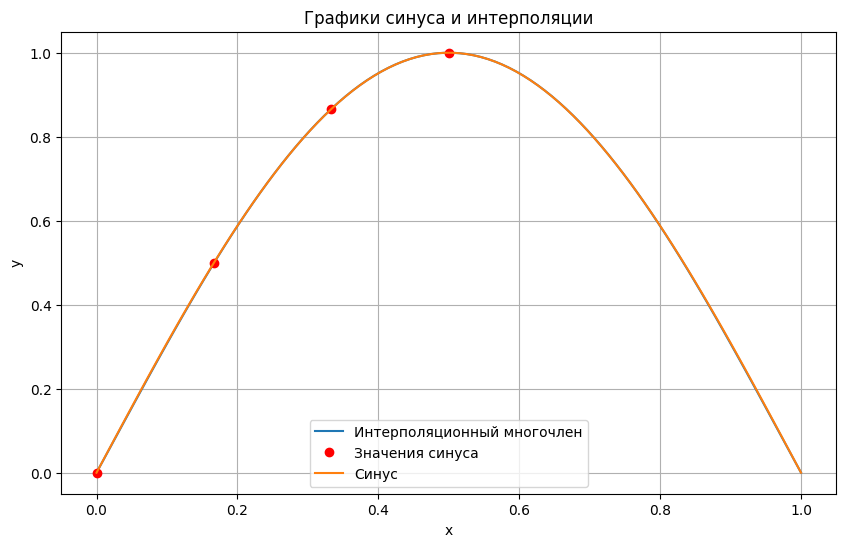

In [28]:
#3 задание
import numpy as np
import matplotlib.pyplot as plt

def lagrange_interpolation(x, y, x_interp):
    n = len(x)
    interp_values = np.zeros_like(x_interp)
    for i in range(n):
        l = np.ones_like(x_interp)
        for j in range(n):
            if i != j:
                l *= (x_interp - x[j]) / (x[i] - x[j])
        interp_values += y[i] * l
    return interp_values

# Заданные точки
x = np.array([0, 1/4, 1/2, 3/4, 1])
y = np.sin(np.pi * x)

# Интерполяция
x_interp = np.linspace(0, 1, 100)
y_interp = lagrange_interpolation(x, y, x_interp)

# Значения синуса
x_values = np.array([0, 1/6, 1/3, 1/2])
y_values = np.sin(np.pi * x_values)

# Построение графиков
plt.figure(figsize=(10, 6))
plt.plot(x_interp, y_interp, label='Интерполяционный многочлен')
plt.plot(x_values, y_values, 'ro', label='Значения синуса')
plt.plot(x_interp, np.sin(np.pi * x_interp), label='Синус')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графики синуса и интерполяции')
plt.legend()
plt.grid(True)
plt.show()


In [33]:
#6 задание
import numpy as np

def runge_function(x):
    return 1 / (1 + 25 * x**2)
    
def lagrange_interpolation(x, x_nodes, y_nodes):
    n = len(x_nodes)
    result = 0
    for i in range(n):
        p = 1
        for j in range(n):
            if i != j:
                p *= (x - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
        result += y_nodes[i] * p
    return result
    
x_nodes = np.linspace(-5, 5, 10)
y_nodes = runge_function(x_nodes)

x1 = 4
x2 = 5

y_runge1 = runge_function(x1)
y_runge2 = runge_function(x2)

y_interpolation1 = lagrange_interpolation(x1, x_nodes, y_nodes)
y_interpolation2 = lagrange_interpolation(x2, x_nodes, y_nodes)

print("Значение функции Рунге в точке x =", x1, ":", y_runge1)
print("Значение функции Рунге в точке x =", x2, ":", y_runge2)
print("Значение интерполяционного полинома в точке x =", x1, ":", y_interpolation1)
print("Значение интерполяционного полинома в точке x =", x2, ":", y_interpolation2)



Значение функции Рунге в точке x = 4 : 0.0024937655860349127
Значение функции Рунге в точке x = 5 : 0.001597444089456869
Значение интерполяционного полинома в точке x = 4 : -0.009193540822272528
Значение интерполяционного полинома в точке x = 5 : 0.001597444089456869


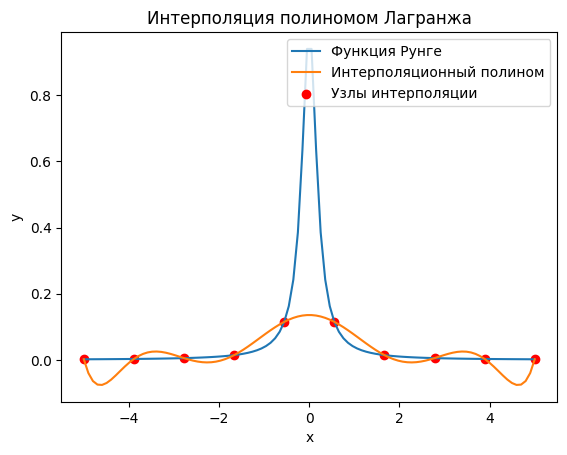

In [32]:
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
y_true = runge_function(x)
y_interpolation = lagrange_interpolation(x, x_nodes, y_nodes)

plt.plot(x, y_true, label='Функция Рунге')
plt.plot(x, y_interpolation, label='Интерполяционный полином')
plt.scatter(x_nodes, y_nodes, color='red', label='Узлы интерполяции')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Интерполяция полиномом Лагранжа')
plt.show()


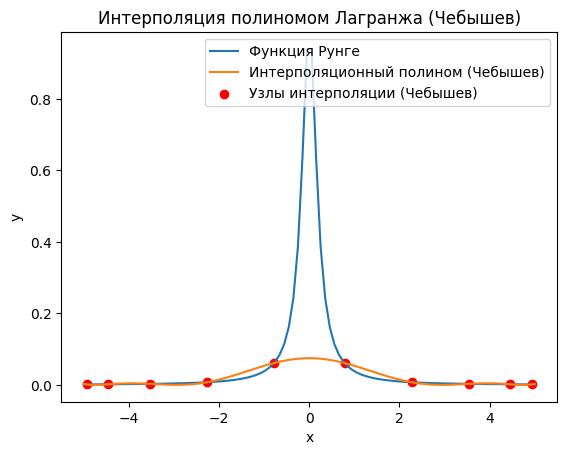

In [34]:
#7 задание
x_cheb = 5 * np.cos((2 * np.arange(10) + 1) / (2 * 10) * np.pi)
y_cheb = runge_function(x_cheb)

y_interpolation_cheb = lagrange_interpolation(x, x_cheb, y_cheb)

plt.plot(x, y_true, label='Функция Рунге')
plt.plot(x, y_interpolation_cheb, label='Интерполяционный полином (Чебышев)')
plt.scatter(x_cheb, y_cheb, color='red', label='Узлы интерполяции (Чебышев)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Интерполяция полиномом Лагранжа (Чебышев)')
plt.show()